<a href="https://colab.research.google.com/github/shazahra/Python-final-project/blob/main/tugas_akhir_ZahraShafia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HELP International has successfully raised around $10 million. Currently, the NGO's CEO needs to decide how to use this money strategically and effectively. Therefore, the CEO must make a decision to choose the country that needs the most help. Hence, your task is to categorize countries using several socio-economic and health factors that determine the overall development of a country. Then, you need to suggest which countries should be the CEO's main focus.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Circle
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Data_Negara_HELP.csv')
df.head()

,Country,Child_mortality,Export,Health,Import,Income,Inflation,Life_expectancy,Total_fertility,GDPpercapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
#Checking for any NA values in the data
if df.isna().values.any():
    print("True")
else:
    print("False")


False


<Figure size 1200x1000 with 0 Axes>

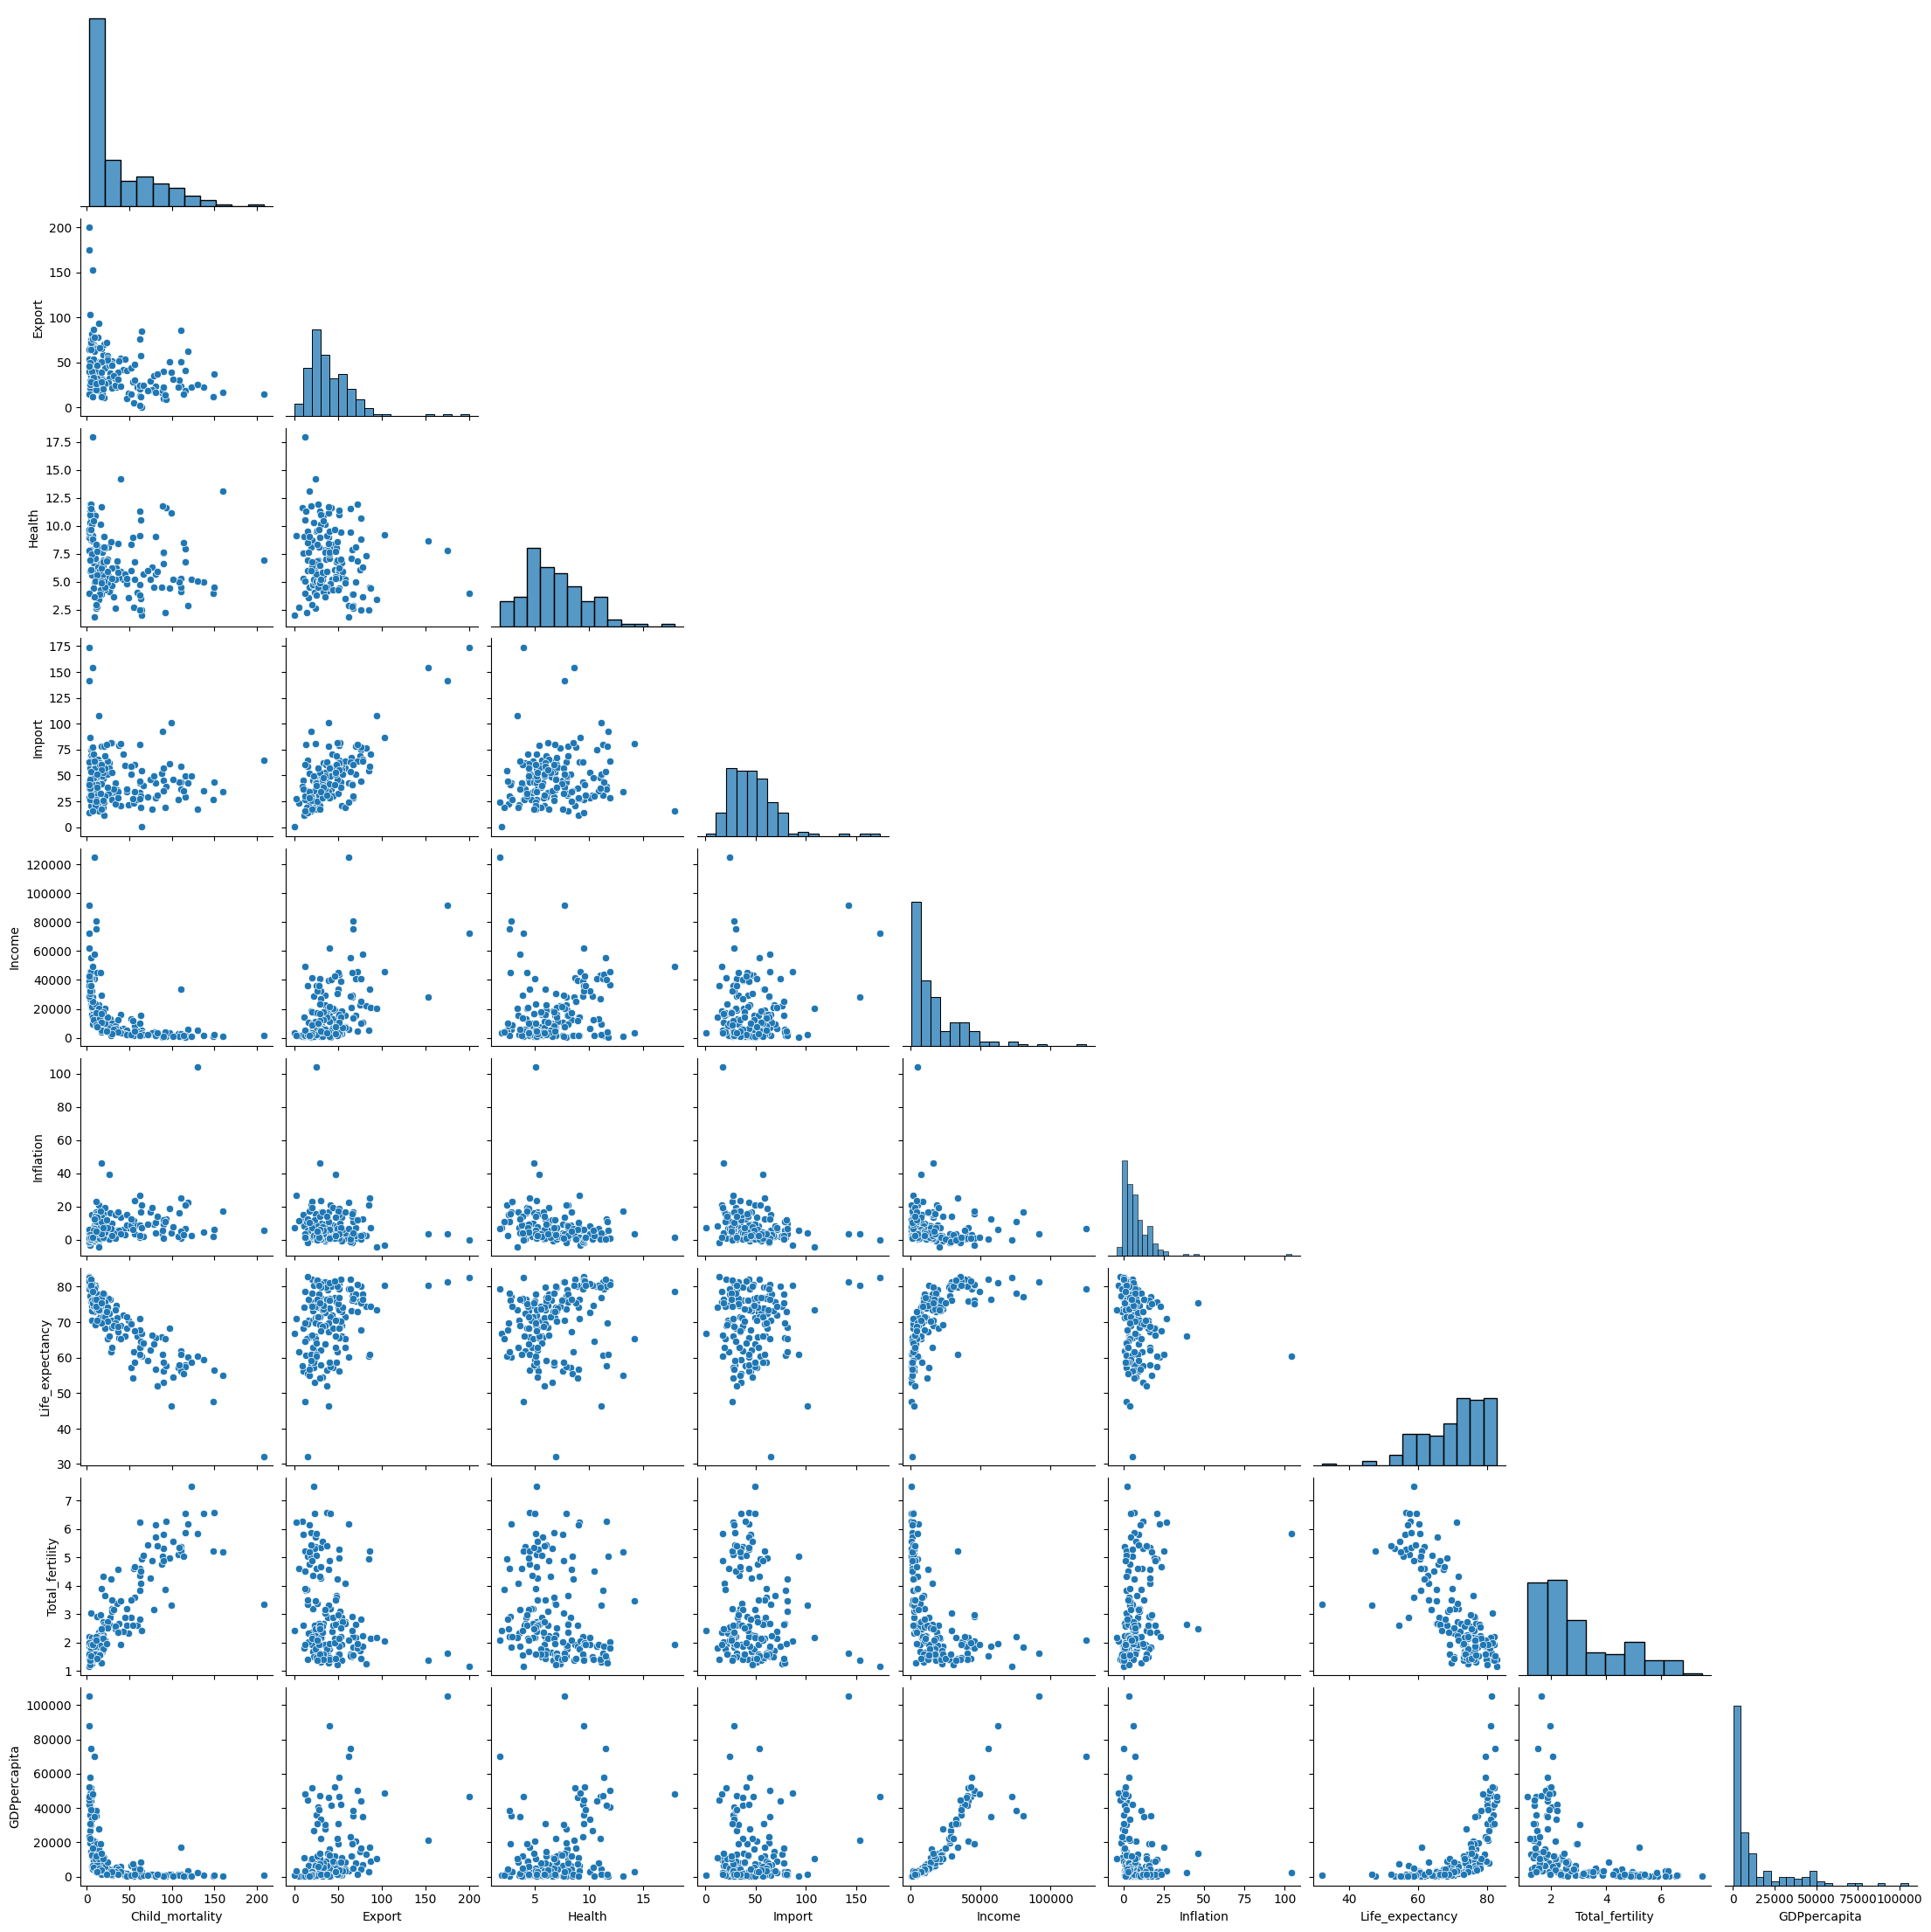

In [20]:
#checking if there is any correlation between variables

df_correlation = df.drop(columns=['Country'])

# making a pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_correlation, corner=True)
plt.show()


In the plot above, variables that show an almost absolute positive or negative correlation trend indicate that they are not independent. Therefore, we can choose only one of these variables. For example, child mortality has a very strong correlation with fertility and life expectancy, namely: (i) The higher the fertility, the higher the child mortality; (ii) The higher the child mortality, the lower the life expectancy. Thus, we can use child mortality to represent the fertility variable and life expectancy as the response variable. Meanwhile, health expenditure is closely related to child mortality and will be analyzed as a predictor for child mortality.
On the other hand, income and GDP per capita have a positive correlation, so in this analysis, GDP will represent income as the response variable. Exports and imports, whose effects are not directly visible and do not correlate with each other, will be used as predictor variables because these three variables are likely closely related to GDP and income.

In [22]:
#Countries with the lowest GDP and highest child mortality, 10th percentile
percentile_Child_mortality = df['Child_mortality'].quantile(0.90)
percentile_gdp = df['GDPpercapita'].quantile(0.10)

# Select rows with child mortality and GDP values below or equal to the 10th percentile.
lowest_data_p10 = df[(df['Child_mortality'] <= percentile_Child_mortality) &
 (df['GDPpercapita'] <= percentile_gdp)]

print("Lowest GDP and and Child mortality (10th percentile):")
print(lowest_data_p10)

Lowest GDP and and Child mortality (10th percentile):
         Country  Child_mortality  Export  Health  Import  Income  Inflation  \
0    Afghanistan             90.2   10.00    7.58    44.9    1610       9.44   
26       Burundi             93.6    8.92   11.60    39.2     764      12.30   
50       Eritrea             55.2    4.79    2.66    23.3    1420      11.60   
56        Gambia             80.3   23.80    5.69    42.7    1660       4.30   
88       Liberia             89.3   19.10   11.80    92.6     700       5.47   
93    Madagascar             62.2   25.00    3.77    43.0    1390       8.79   
94        Malawi             90.5   22.80    6.59    34.9    1030      12.10   
109        Nepal             47.0    9.58    5.25    36.4    1990      15.10   
126       Rwanda             63.6   12.00   10.50    30.0    1350       2.61   
150         Togo             90.3   40.20    7.65    57.3    1210       1.18   

     Life_expectancy  Total_fertility  GDPpercapita  
0          

Then, considering the two main response variables, the countries that are most likely in need of assistance are: Afghanistan, Burundi, Eritrea, Gambia, Liberia, Madagascar, Malawi, Nepal, Rwanda, and Togo. This is because these countries are in the highest percentile for child mortality (top 10%) and the lowest percentile for GDP (bottom 10%). However, let's further analyze using clustering methods.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

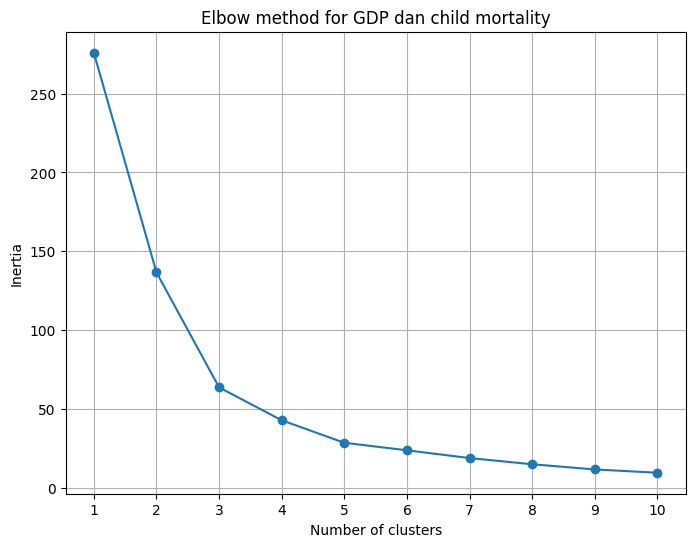

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

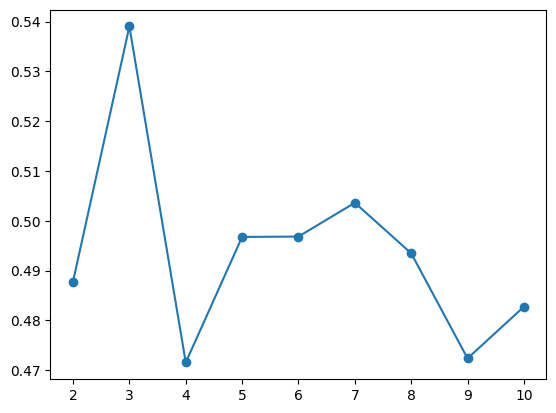

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


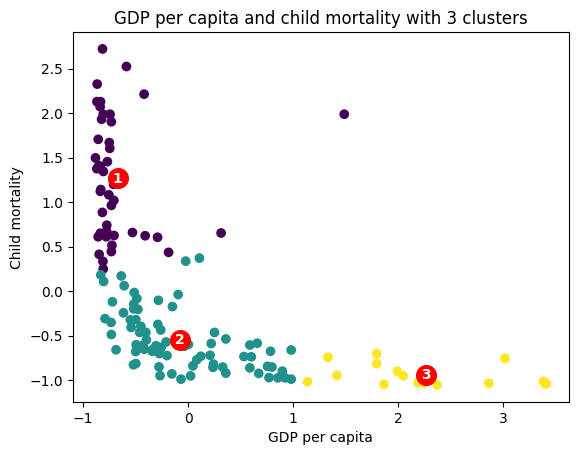

Cluster 1: ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia']
Cluster 2: ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kaza

<ipython-input-23-028f7f4800d5>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_after['Cluster'] = cluster_3


,Country,Child_mortality,Export,Health,Import,Income,Inflation,Life_expectancy,Total_fertility,GDPpercapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [23]:
#Clustering GDP vs child mortality

A = ['GDPpercapita', 'Child_mortality']

#delete outlier
Q1 = df[A].quantile(0.25)
Q3 = df[A].quantile(0.75)
IQR = Q3 - Q1

A_after = df[~((df[A] < (Q1 - 1.5 * IQR)) | (df[A] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A_after[A])


# inertia for k
inertia = []

# k-means clustering for k between 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for GDP dan child mortality')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Loop for calculating silhouette score
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(A_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(A_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 is chosen

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(A_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(A_scaled[:, 0], A_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.ylabel('Child mortality')
plt.xlabel('GDP per capita')
plt.title('GDP per capita and child mortality with 3 clusters')
plt.show()

#country name for each cluster
A_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = A_after.groupby('Cluster')['Country'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster+1}: {countries}')
A_after.head()

The number of clusters is determined using the elbow and silhouette methods, comparing child mortality and GDP per capita as the two primary response variables. The results show:


*   Cluster 3: These countries do not need assistance because they have low child mortality and high GDP.
*   Cluster 2: These countries are in urgent need of assistance due to their low GDP and high child mortality.
*   Cluster 1: These countries can be considered as Reserve countries that need assistance. Countries in this cluster likely have relatively stable living conditions, and their low GDP may be influenced by other economic factors.

To confirm this theory, let's cluster GDP with inflation, exports, and imports.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

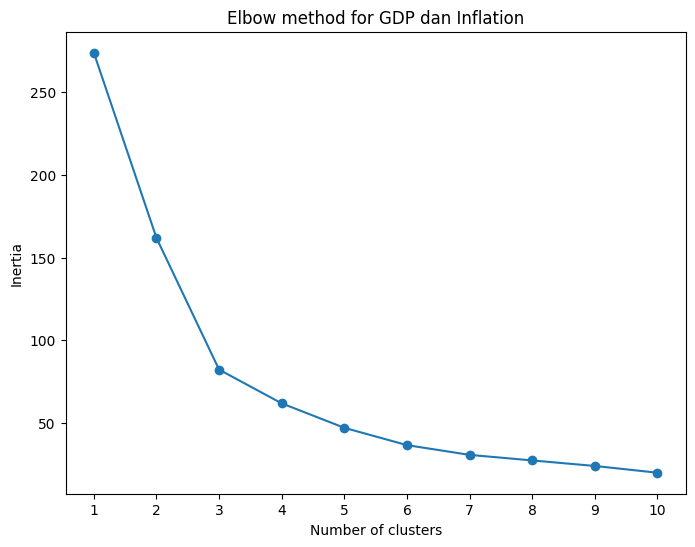

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

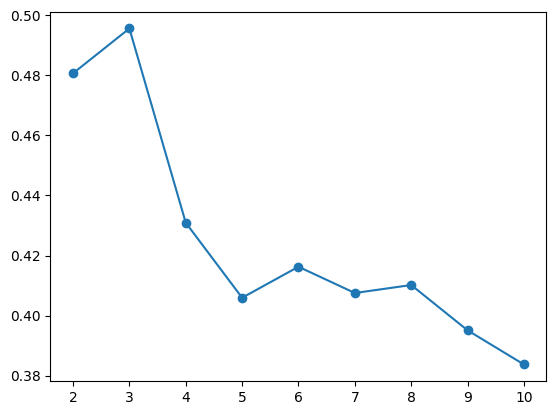

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


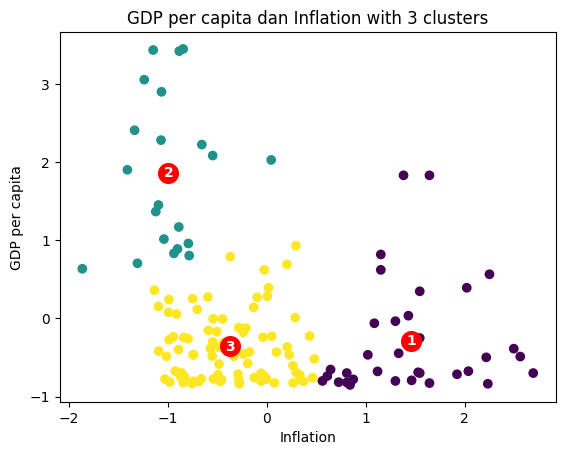

Cluster 1: ['Algeria', 'Angola', 'Argentina', 'Azerbaijan', 'Belarus', 'Burundi', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Eritrea', 'Gabon', 'Ghana', 'Guinea', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Libya', 'Malawi', 'Mauritania', 'Moldova', 'Nepal', 'Oman', 'Pakistan', 'Russia', 'Saudi Arabia', 'Sierra Leone', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia']
Cluster 2: ['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Greece', 'Hungary', 'Israel', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Portugal', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain']
Cluster 3: ['Afghanistan', 'Albania', 'Armenia', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cot

<ipython-input-24-bdaf8ddeb9a2>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_after['Cluster'] = cluster_3


In [24]:
#GDP dan Inflation

B = ['Inflation', 'GDPpercapita']

#delete outlier
Q1 = df[B].quantile(0.25)
Q3 = df[B].quantile(0.75)
IQR = Q3 - Q1

B_after = df[~((df[B] < (Q1 - 1.5 * IQR)) | (df[B] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
B_scaled = scaler.fit_transform(B_after[B])

# Inertia for k
inertia = []

# k-means clustering for k between 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(B_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for GDP dan Inflation')
plt.xticks(range(1, 11))
plt.show()

# Loop to find silhouette score
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(B_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(B_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 is chosen

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(B_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(B_scaled[:, 0], B_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Inflation')
plt.ylabel('GDP per capita')
plt.title('GDP per capita dan Inflation with 3 clusters')
plt.show()

#country name for each cluster
B_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = B_after.groupby('Cluster')['Country'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster+1}: {countries}')



The inflation cluster is divided into three, with the lowest urgency in Cluster 3, which has low inflation and high GDP; these countries can be removed from the list of countries needing assistance. Although inflation tends to have negative connotations, many poor countries have low inflation due to hindered economic growth and inadequate infrastructure. Therefore, Cluster 1 should be prioritized for natural disaster aid, as these countries may struggle to rebuild their infrastructure. However, countries with higher inflation have potential for long-term development.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

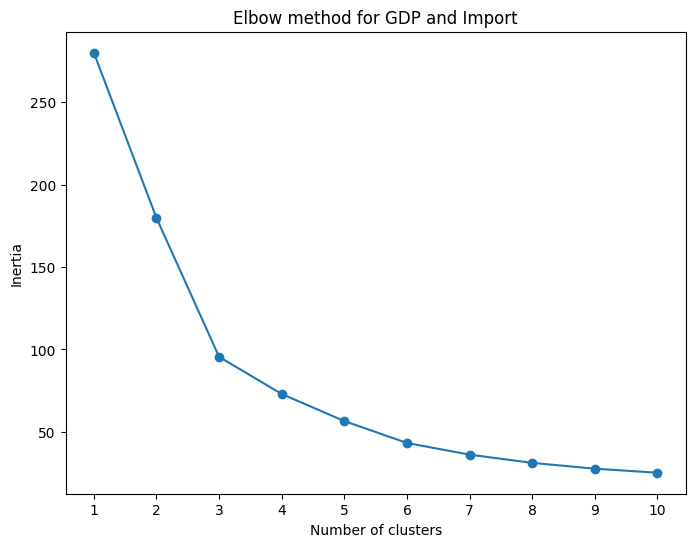

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

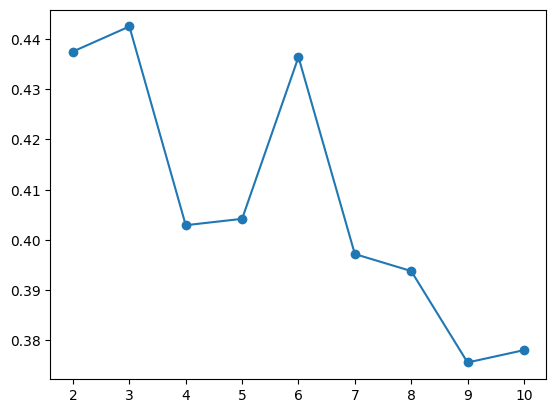

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


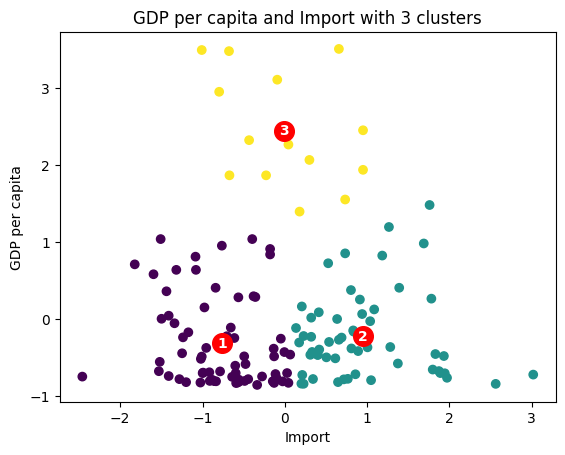

Cluster 1: ['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nigeria', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sri Lanka', 'Sudan', 'Suriname', 'Tanzania', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'Uganda', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']
Cluster 2: ['Albania', 'Antigua and Barbuda', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Co

<ipython-input-25-ab559810223b>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_after['Cluster'] = cluster_3


In [25]:
#GDP and import

C = ['Import', 'GDPpercapita']

#delete outlier
Q1 = df[C].quantile(0.25)
Q3 = df[C].quantile(0.75)
IQR = Q3 - Q1

C_after = df[~((df[C] < (Q1 - 1.5 * IQR)) | (df[C] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
C_scaled = scaler.fit_transform(C_after[C])

# Inersia for k
inertia = []

# k-means clustering for k between 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(C_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for GDP and Import')
plt.xticks(range(1, 11))
plt.show()

# Loop for silhouette score
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(C_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(C_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 is chosen

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(C_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Import')
plt.ylabel('GDP per capita')
plt.title('GDP per capita and Import with 3 clusters')
plt.show()

#Country name for each cluster
C_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = C_after.groupby('Cluster')['Country'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster+1}: {countries}')


For the next clustering, Cluster 3 has high GDP and imports, although the imports are not as high as those in Cluster 1. This pattern is generally characteristic of developed countries. These countries have the financial capability to import, but because their population tends to be relatively small, the volume of imports is not as high as in Cluster 1, which consists of developing countries. Cluster 1 has a high population and diverse needs, but their GDP tends to be low to moderate. Cluster 2 likely includes many poor countries where the volume of imports is generally smaller compared to developed and developing countries due to limited financial resources. However, some countries in Cluster 2 could be developing countries with a relatively small population or countries with sufficient resources for their population.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

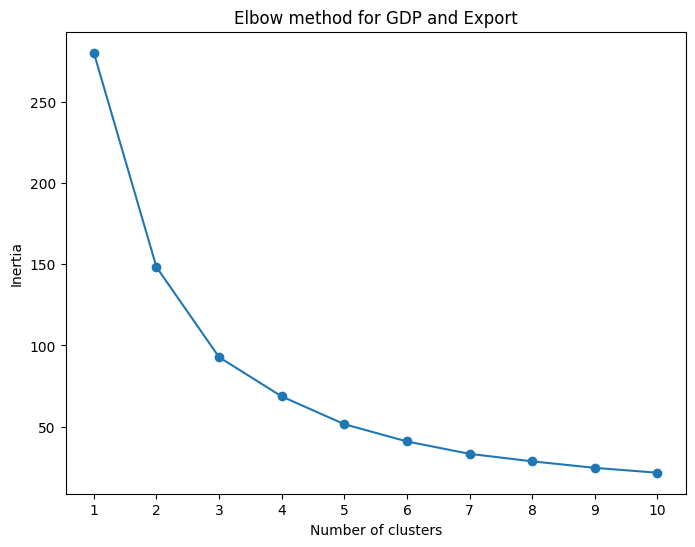

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

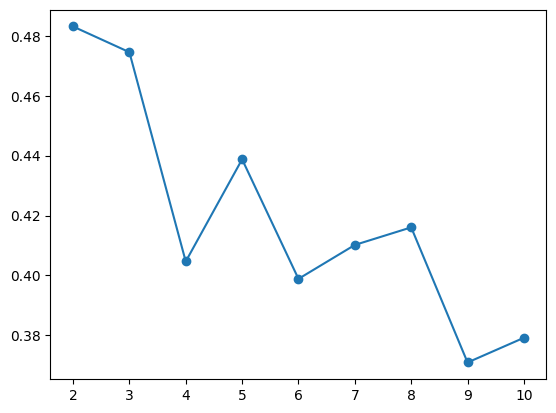

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


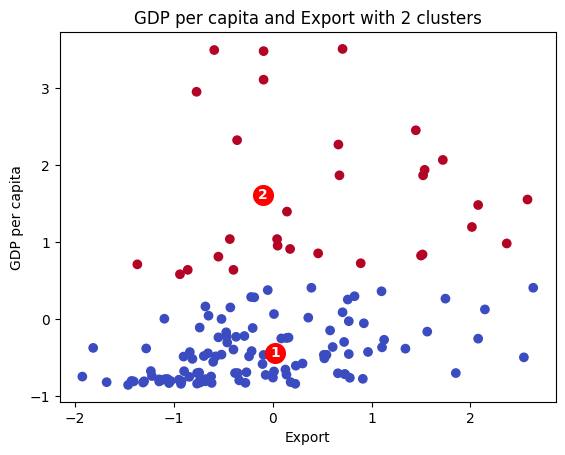

Cluster 1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Pa

<ipython-input-26-daba28de22e8>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_after['Cluster'] = cluster_2


In [26]:
#GDP and export
D = ['Export', 'GDPpercapita']

# delete outlier
Q1 = df[D].quantile(0.25)
Q3 = df[D].quantile(0.75)
IQR = Q3 - Q1

D_after = df[~((df[D] < (Q1 - 1.5 * IQR)) | (df[D] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
D_scaled = scaler.fit_transform(D_after[D])

# inersia for k
inertia = []

# k-means clustering for k between 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(D_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for GDP and Export')
plt.xticks(range(1, 11))
plt.show()

# Loop for calculating silhouette
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(D_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(D_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

#K=2 is chosen

kmeans_2 = KMeans(n_clusters=2)
cluster_2 = kmeans_2.fit_predict(C_scaled)
centers_2 = kmeans_2.cluster_centers_

plt.scatter(D_scaled[:, 0], D_scaled[:, 1], c=cluster_2, cmap='coolwarm')
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_2):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Export')
plt.ylabel('GDP per capita')
plt.title('GDP per capita and Export with 2 clusters')
plt.show()

#Country name for each clusters
D_after['Cluster'] = cluster_2

# Grouping countries by cluster
cluster_groups = D_after.groupby('Cluster')['Country'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster+1}: {countries}')


Next, the cluster analysis for exports is divided into two groups. Cluster 1 appears to be populated by developed countries that do not require assistance because they have high export levels. Developed countries typically have highly developed industries with the latest technology and innovation, large production capacities, a strong reputation, extensive trade networks, free trade agreements, and economic diversification that enable them to export various goods and services globally.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

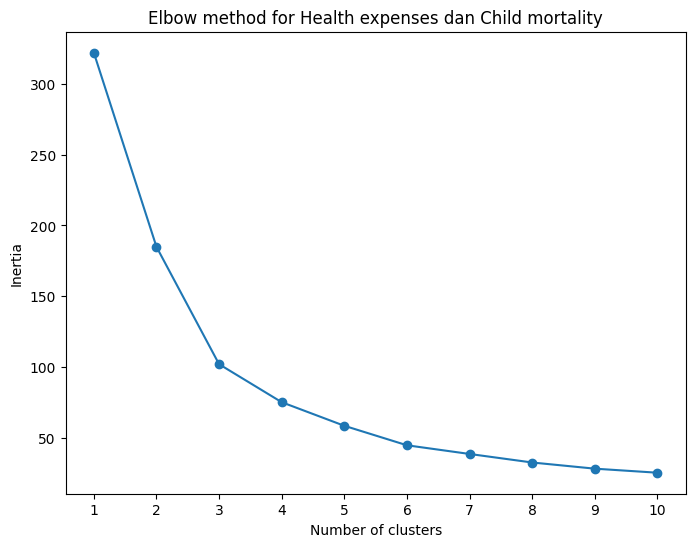

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

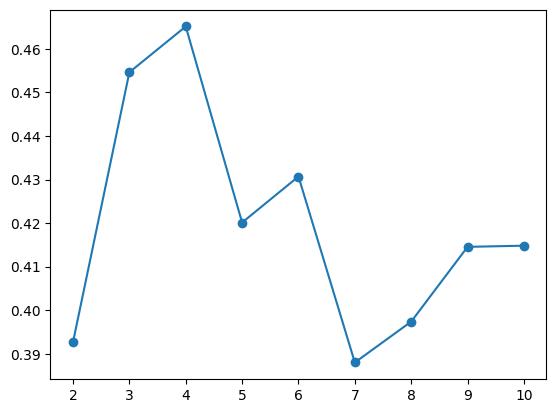

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


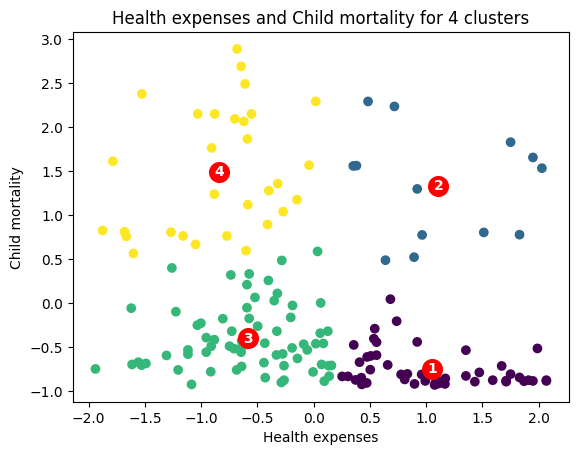

Cluster 1: ['Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Poland', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Uruguay']
Cluster 2: ['Afghanistan', 'Botswana', 'Burundi', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Kiribati', 'Lesotho', 'Liberia', 'Rwanda', 'South Africa', 'Timor-Leste', 'Togo', 'Uganda']
Cluster 3: ['Albania', 'Algeria', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Brunei', 'Bulgaria', 'Cambodia', 'Cape Verde', 'China', 'Cyprus', 'Do

<ipython-input-27-64d99b868316>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_after['Cluster'] = cluster_4


In [27]:
#Child mortality and health expenses
E = ['Health', 'Child_mortality']

#delete outlier
Q1 = df[E].quantile(0.25)
Q3 = df[E].quantile(0.75)
IQR = Q3 - Q1

E_after = df[~((df[E] < (Q1 - 1.5 * IQR)) | (df[E] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
E_scaled = scaler.fit_transform(E_after[E])

# Inersia for k
inertia = []

# k-means clustering for k between 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(E_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for Health expenses dan Child mortality')
plt.xticks(range(1, 11))
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(E_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(E_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

#k=4 dipilih

kmeans_4 = KMeans(n_clusters=4)
cluster_4 = kmeans_4.fit_predict(E_scaled)
centers_4 = kmeans_4.cluster_centers_

plt.scatter(E_scaled[:, 0], E_scaled[:, 1], c=cluster_4, cmap='viridis')
plt.scatter(centers_4[:, 0], centers_4[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_4):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Health expenses')
plt.ylabel('Child mortality')
plt.title('Health expenses and Child mortality for 4 clusters')
plt.show()

# Country name for each clusters
E_after['Cluster'] = cluster_4

# Grouping countries by cluster
cluster_groups = E_after.groupby('Cluster')['Country'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster+1}: {countries}')

Countries in Cluster 2 should be prioritized as aid recipients due to their high mortality rates, likely caused by a lack of financial resources. Countries in Cluster 4 have likely received donations from various parties but have social conditions that are not conducive, such as war, resulting in high healthcare costs and still high child mortality rates. Providing funding to countries in Cluster 4 may not be sustainable unless they cease experiencing social conflict.

In [29]:
#countries that are in the intersection of the recommended clusters
childmortality_healthexpenses = ['Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'India', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Senegal', 'Sudan', 'Tanzania', 'Turkmenistan', 'Yemen', 'Zambia']
GDP_export = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Rwanda', 'Samoa', 'Senegal', 'Serbia', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Tunisia', 'Turkmenistan', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia']
GDP_import = ['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nigeria', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sri Lanka', 'Sudan', 'Suriname', 'Tanzania', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'Uganda', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']
GDP_inflation = ['Afghanistan', 'Albania', 'Armenia', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Gambia', 'Georgia', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Rwanda', 'Samoa', 'Senegal', 'Serbia', 'Solomon Islands', 'South Africa', 'St. Vincent and the Grenadines', 'Suriname', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Uruguay', 'Vanuatu']
GDP_childmortality = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia']

Countries = set(childmortality_healthexpenses) & set(GDP_export) & set(GDP_import) & set(GDP_inflation) & set(GDP_childmortality)

# Show results
print("Countries within interaction:", Countries)

Countries within interaction: {'Madagascar', 'Burkina Faso', 'Senegal', 'India', 'Gambia', 'Tanzania', 'Turkmenistan', 'Kenya', 'Cameroon', 'Myanmar', 'Mozambique', 'Benin', 'Mali', "Cote d'Ivoire"}


The conclusion is that countries which should be targeted for donor support are those at the intersection of the recommended clusters, namely Kenya, Cameroon, Madagascar, Mali, Turkmenistan, Tanzania, Cote d’Ivoire, Burkina Faso, Mozambique, Senegal, Gambia, India, Myanmar, and Benin.